## Day 32 Lecture 1 Assignment

In this assignment, we will learn about K nearest neighbor regression. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [55]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ds_useful as ds

[My Useful Data Science Functions](https://github.com/cobyoram/python-for-data-scientists/blob/master/ds_useful.py)

In [69]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [70]:
print(absent.columns)
absent.head()

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


Find which variables have the highest pairwise correlation and remove them from our dataset. Additionally, try to think of which variables are correlated by looking at the column names and remove those columns as well.

Note: When choosing between two categeoricla variables that are correlated, keep the one with fewer values.

In [71]:
# answer below:

# ds.remove_correlated_features(absent, 'Absenteeism time in hours', .7)
# print(absent.columns)
# absent

ds.similar_variables(absent, 'Absenteeism time in hours', .5)

Reason for absence   -0.124248
Service time          0.065760
Body mass index      -0.049719
dtype: float64

Find out which columns contain categorical variables and turn those into dummy variables.

In [59]:
# answer below:

# Since BMI is basically an interaction variable between height and weight, we'll drop those instead and keep BMI
# We'll also drop month, because it and season represent basically the same thing, but season has less classes lmaooooooo.

drop_cols = ['Month of absence', 'Height', 'Weight', 'Reason for absence', 'Service time']
simpler_abs = absent.drop(drop_cols, axis=1)
simpler_abs.head()

,ID,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Body mass index,Absenteeism time in hours
0,11,3,1,289,36,33,239.554,97,0,1,2,1,0,1,30,4
1,36,3,1,118,13,50,239.554,97,1,1,1,1,0,0,31,0
2,3,4,1,179,51,38,239.554,97,0,1,0,1,0,0,31,2
3,7,5,1,279,5,39,239.554,97,0,1,2,1,1,0,24,4
4,11,5,1,289,36,33,239.554,97,0,1,2,1,0,1,30,2


In [60]:
# Define a function that gets categorical columns numeric or not
def get_categorical_columns(df, unique_thresh=10):
    columns = []
    for col in df.columns:
        if df[col].nunique() < unique_thresh:
            columns.append(col)
    return columns

cat_cols = get_categorical_columns(simpler_abs)

In [61]:
simpler_abs[cat_cols] = simpler_abs[cat_cols].astype('object')
dummies = pd.get_dummies(simpler_abs[cat_cols], drop_first=True)
dummies.head()

,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Seasons_2,Seasons_3,Seasons_4,Disciplinary failure_1,Education_2,Education_3,...,Son_2,Son_3,Son_4,Social drinker_1,Social smoker_1,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [62]:
abs_feats = pd.concat([simpler_abs.drop(cat_cols, axis=1), dummies], axis=1)
abs_feats.head()

,ID,Transportation expense,Distance from Residence to Work,Age,Work load Average/day,Hit target,Body mass index,Absenteeism time in hours,Day of the week_3,Day of the week_4,...,Son_2,Son_3,Son_4,Social drinker_1,Social smoker_1,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8
0,11,289,36,33,239.554,97,30,4,1,0,...,1,0,0,1,0,1,0,0,0,0
1,36,118,13,50,239.554,97,31,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,3,179,51,38,239.554,97,31,2,0,1,...,0,0,0,1,0,0,0,0,0,0
3,7,279,5,39,239.554,97,24,4,0,0,...,1,0,0,1,1,0,0,0,0,0
4,11,289,36,33,239.554,97,30,2,0,0,...,1,0,0,1,0,1,0,0,0,0


Split the data into train and test with test containing 20% of the data.

In [63]:
# answer below:
from sklearn.model_selection import train_test_split

X = abs_feats.drop('Absenteeism time in hours', axis=1)
y = abs_feats['Absenteeism time in hours']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=679)

In [64]:
from sklearn.metrics import mean_squared_error 

Train a KNN regression model using k=15 and compute the MSE for the test subsample.

In [65]:
# answer below

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=15)
knn.fit(X_train, Y_train)

print(knn.score(X_train, Y_train))
print(knn.score(X_test, Y_test))

0.13915058261089053
-0.07302063085871557


In [66]:
preds = knn.predict(X_test)

mse = mean_squared_error(preds, Y_test)
mse

306.5962462462463

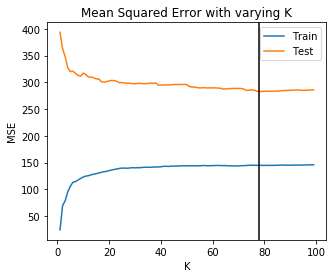

Best K: 78


In [67]:
train_errors = []
test_errors = []
# k_list = [1, 3, 5, 7, 9, 11, 13, 15, 41, 71]
k_list = np.arange(1, 100, 1)
for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_train_pred = knn.predict(X_train)
    Y_pred = knn.predict(X_test)
    train_errors.append(mean_squared_error(Y_train, Y_train_pred))
    test_errors.append(mean_squared_error(Y_test, Y_pred))

best_k = pd.DataFrame(test_errors, index=k_list).sort_values(by=0).index[0]

plt.figure(figsize=(5,4))
plt.plot(k_list, train_errors, label='Train')
plt.plot(k_list, test_errors, label='Test')
plt.axvline(best_k, c='k')
plt.title('Mean Squared Error with varying K')
plt.xlabel('K')
plt.ylabel('MSE')
plt.legend()
plt.show()

print('Best K: {}'.format(best_k))